# Análisis Exploratorio de Datos

## Integrantes:

- Juan Yanza
- Miguel Narváez

El presente análisis tiene como finalidad analizar características principales de las aplicaciones de google play y app store, tales como su nivel de popularidad, su puntuación, tamaño en MB, correlación entre atributos de las mismas, etc...

## Librerias a utilizar.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored  # Formatear salida, instalar

## Carga de los datasets

- Fuente: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps
- Nombre del Dataset: df_AppStore


In [3]:
df_appstore = pd.read_csv('AppleStore.csv')
df_appstore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
df_appstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


- Fuente: https://play.google.com/store/apps/new?hl=es_EC&gl=US & Scraping
- Nombre del Dataset: df_PlayStore

In [5]:
df_playstore = pd.read_csv('apps_data.csv')
df_playstore.head()

,Unnamed: 0,app,link,rated,valorations,gender,last_update,size,installs,current_version_app,android_version_req,classification
0,0,Messenger: mensajes y videollamadas gratis,https://play.google.com/store/apps/details?id=...,4.1,78190690,Comunicación,19 de mayo de 2021,0.0,5000000000,313.0.0.15.119,Varía con el dispositivo.,Todos
1,1,TikTok,https://play.google.com/store/apps/details?id=...,4.4,35214308,Social,20 de mayo de 2021,92.0,1000000000,19.5.42,4.4,Adolescentes
2,2,Facebook,https://play.google.com/store/apps/details?id=...,2.3,116060301,Social,19 de mayo de 2021,0.0,5000000000,Varía con el dispositivo.,Varía con el dispositivo.,Adolescentes
3,3,Candy Crush Saga,https://play.google.com/store/apps/details?id=...,4.6,31248204,Juegos ocasionales,7 de mayo de 2021,0.0,1000000000,1.202.0.2,4.4,Todos
4,4,Facebook Lite,https://play.google.com/store/apps/details?id=...,3.2,18231065,Social,19 de mayo de 2021,0.0,1000000000,Varía con el dispositivo.,Varía con el dispositivo.,Adolescentes


In [6]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           77 non-null     int64  
 1   app                  77 non-null     object 
 2   link                 77 non-null     object 
 3   rated                77 non-null     float64
 4   valorations          77 non-null     int64  
 5   gender               77 non-null     object 
 6   last_update          77 non-null     object 
 7   size                 77 non-null     float64
 8   installs             77 non-null     int64  
 9   current_version_app  77 non-null     object 
 10  android_version_req  77 non-null     object 
 11  classification       77 non-null     object 
dtypes: float64(2), int64(3), object(7)
memory usage: 7.3+ KB


## Integración de datos

In [7]:
# se cambia el nombre de la columna del dataframe Play store para poder aplicar el metodo Merge
df_playstore.rename(columns={'app':'track_name'},inplace=True)

In [8]:
# Se hace uso del método "Merge" para integrar los dos DataFrames.
df_final = df_appstore.merge(df_playstore, how='left', on='track_name')

# Se procede a eliminar las columnas inecesarias para el análisis exploratorio.
df_final = df_final.drop(['currency', 'rating_count_ver', 'user_rating_ver', 'link', 'size', 'last_update', 'current_version_app', 'android_version_req', 'id','Unnamed: 0_y','vpp_lic','ipadSc_urls.num', 'Unnamed: 0_x' ],axis=1)
df_final

,track_name,size_bytes,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre,sup_devices.num,lang.num,rated,valorations,gender,installs,classification
0,PAC-MAN Premium,100788224,3.99,21292,4.0,6.3.5,4+,Games,38,10,NaN,NaN,NaN,NaN,NaN
1,Evernote - stay organized,158578688,0.00,161065,4.0,8.2.2,4+,Productivity,37,23,NaN,NaN,NaN,NaN,NaN
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,5.0.0,4+,Weather,37,3,NaN,NaN,NaN,NaN,NaN
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,5.10.0,12+,Shopping,37,9,NaN,NaN,NaN,NaN,NaN
4,Bible,92774400,0.00,985920,4.5,7.5.1,4+,Reference,37,45,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7193,Kubik,126644224,0.00,142,4.5,1.3,4+,Games,38,1,NaN,NaN,NaN,NaN,NaN
7194,VR Roller-Coaster,120760320,0.00,30,4.5,0.9,4+,Games,38,1,NaN,NaN,NaN,NaN,NaN
7195,Bret Michaels Emojis + Lyric Keyboard,111322112,1.99,15,4.5,1.0.2,9+,Utilities,37,1,NaN,NaN,NaN,NaN,NaN
7196,VR Roller Coaster World - Virtual Reality,97235968,0.00,85,4.5,1.0.15,12+,Games,38,2,NaN,NaN,NaN,NaN,NaN


# 1. Análisis Exploratorio de datos del dataset

<h1 style="color:blue">Pie Chart</h1>.

El gráfico circular, gráfico de tarta o pie chart es adecuado para mostrar proporciones en un conjunto cuando solo se pretende comunicar el orden de magnitud de éstas y no existe la necesidad de ser especialmente exactos en la interpretación.

## ¿Cuales son los generos más populares de aplicaciones de appstore?

Se puede observa en el presente conjunto de aplicaciones de app store y play store que existe
una gran cantidad Juegos especificamente un **70.9%**, lo que puede significar que existe una
preferencia por los juegos de móvil de parte de los usuarios o que es un mercado más factible
a comparación de los demás generos se encuentran distribuidos muy parejo, donde las 
aplicaciones de entretenimiento y educación
las más comunes dentro del conjunto de datos.

([<matplotlib.patches.Wedge at 0x207e283f848>,
 [Text(-0.6711462967780382, 0.8715289142197898, 'Games'),
  Text(0.05516237650497376, -1.098615998526475, 'Entertainment'),
  Text(0.6390487036225442, -0.895330528016523, 'Education'),
  Text(0.9716788070308273, -0.5155970286640026, 'Photo & Video'),
  Text(1.0887707464593057, -0.1567745567828103, 'Utilities')],
 [Text(-0.3660797982425662, 0.47537940775624893, '70.9 %'),
  Text(0.030088569002712957, -0.59924509010535, '9.8 %'),
  Text(0.3485720201577513, -0.4883621061908307, '8.3 %'),
  Text(0.5300066220168148, -0.2812347429076377, '6.4 %'),
  Text(0.5938749526141667, -0.08551339460880561, '4.6 %')])

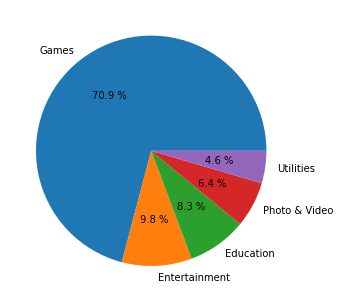

In [13]:
# Variable categórica:
fig = plt.figure()
ax = fig.add_axes([0.5, 0.5, 1, 1])
tab = df_final['prime_genre'].value_counts().head(5)
labels = tab.index
ax.pie(tab, labels = labels, autopct="%0.1f %%")

### App Store
## ¿Cuales son los generos más populares de aplicaciones de appstore?

Por otra parte en cuando a la data de las aplicaciones principales de google play tenemos que el genero mas popular o relevante es Social con un 42.9%, seguidamente de Entretenimiento con 28.6% que a comparación con las aplicaciones de appstore no se encuentra ningun genero similar a social, unicamente se lo puede asociar con aplicaciones de entretenimiendo, pero el género que comprendería aplicaciones sociales en appstore sería Redes Sociales.

([<matplotlib.patches.Wedge at 0x207e28c2c48>,
 [Text(0.2447730130080499, 1.0724207066739067, 'Social'),
  Text(-0.9910657227744873, -0.47727217930807914, 'Entretenimiento'),
  Text(0.24477316361895687, -1.072420672297941, 'Juegos ocasionales'),
  Text(0.991065834488076, -0.4772719473323923, 'Aventura')],
 [Text(0.1335125525498454, 0.5849567490948581, '42.9 %'),
  Text(-0.5405813033315385, -0.2603302796225886, '28.6 %'),
  Text(0.1335126347012492, -0.5849567303443314, '14.3 %'),
  Text(0.5405813642662232, -0.2603301530903958, '14.3 %')])

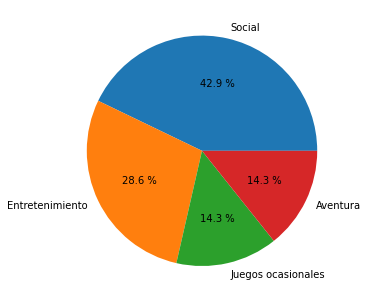

In [14]:
# Variable categórica:
fig = plt.figure()
ax = fig.add_axes([0.5, 0.5, 1, 1])
tab = df_final['gender'].value_counts().head()
labels = tab.index
ax.pie(tab, labels = labels, autopct="%0.1f %%")

## Distribución de Frecuencias de géneros de las aplicaciones.

In [9]:
# Serie numérica discreta:
print(colored('\n Distribución del Género de las Apps:', 'grey', 'on_cyan'))
df_appstore['prime_genre'].value_counts().head(7)  # Tabla de frecuencias de la variable 'prime_genre'


 Distribución del Genero de las Apps:


Games               3862
Entertainment        535
Education            453
Photo & Video        349
Utilities            248
Health & Fitness     180
Productivity         178
Name: prime_genre, dtype: int64

## Distribución porcentual de valoraciones de aplicaciones.

En la presente distribución se encuentra una tercera parte de las aplicaciones con **4.5** que tienen una calificación de **0.0**, es decir del **12.91%** esto se puede interpretar de distintas maneras, tales como que la aplicación fue capturada cuando recién fue lanzada o que la aplicación no cumple para nada con las espectativas de la misma, además existe la posibilidad de que en el momento que se extrajeron los datos esta variable tuvo algún tipo de error.

In [10]:
print(colored('\n Frecuencias porcentuales de valoraciones de las Apps:', 'grey', 'on_yellow'))
tab = pd.crosstab(index=df_final['user_rating'], columns='Porcentaje')
prop = round((tab / tab.sum()) *100, 2)
prop.sort_values(by= 'Porcentaje', ascending=False)


 Frecuencias porcentuales de valoraciones de las Apps:


col_0,Porcentaje
user_rating,
4.5,37.01
4.0,22.59
0.0,12.91
3.5,9.75
5.0,6.84
3.0,5.32
2.5,2.72
2.0,1.47
1.5,0.78


# ¿Cómo se distribuyen las aplicaciones en base a su precio?

La siguiente gráfica representa la distribución de los precios de aplicaciones, con la finalidad de observar cuales son los precios en los que fructúa una aplicación si es de paga y se identificó un **Outlier** especificamente en el precio de una aplicación el cual es de 300 USD, y que lo más frecuente dentro de la app store son precios entre 0 y 20 USD tal como se lo representa en la tabla donde el eje x viene representado por el precio, analizando las medidas de tendencia central se tiene que la media es superior a la moda y la mediana. Demostrando que la mayoria de las aplicaciones son gratis en cuanto a la moda, pero por otro lado que el promedio de precios ronda entre 1.73 USD

## ¿Cómo estan distribuidas las aplicaciones por restricción de contenido?

El contenido de las aplicaciones por lo general es para todo tipo de público pero existe una concentración en aplicaciones para mayores de 4 años, por lo tanto se podría intuír que estas aplicaciones sean Juegos y aplicaciones que un público de 4 años o más pueda utilizar y según la densidad de aplicaciones de tipo juegos pueda que estén repartidos en esa población y las de mayores de 12 años, este factor vendría a darse por algun subgénero adicional por ejemplo acción, aventura, educativos entre otros.

In [11]:
# Serie numérica discreta:
print(colored('\n Distribución de contenido de las Apps:', 'grey', 'on_cyan'))
df_appstore['cont_rating'].value_counts().head(5)  # Tabla de frecuencias de la variable 'cont_rating'


 Distribución de contenido de las Apps:


4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

<h1 style="color:blue">Histograma</h1>.

En estadística, un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

## ¿Cuales son las valoraciones más frecuentes de los usuarios?

En la presente representación tiene como finalidad identificar dentro del conjunto de aplicaciones
cual es la puntuación más frecuente en este caso se evidencia una puntuación entre el rango
**[ 4 - 4.5 ]** por lo tanto refiriendonos a la tabla de frecuencia porcentuales anterior
se tiene que un **59.6%** son valoraciones aceptables o buenas de parte de los usuarios.

<AxesSubplot:ylabel='Frequency'>

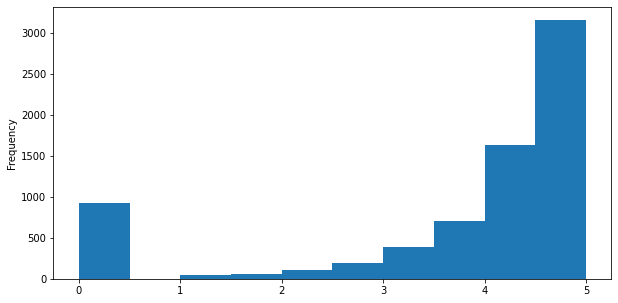

In [12]:
df_final['user_rating'].plot.hist(figsize=(10,5))  # Variable entera

In [17]:
print(df_final[df_final.price>100]['track_name'])
df_final['price'].max()

115     Proloquo2Go - Symbol-based AAC
1480               LAMP Words For Life
Name: track_name, dtype: object


299.99

In [18]:
# Medidas de tendencia central en el precio de apps | Tienda: App Store

media = df_final['price'].mean()
mediana = df_final['price'].median()
moda = df_final['price'].mode()

print("""
    Media: %.2f
    Mediana: %d
    Moda: %d
""" % (media,mediana,moda))


    Media: 1.73
    Mediana: 0
    Moda: 0



2021-05-23 10:09:21,718 [11756] WARNING  py.warnings:110: [JupyterRequire] c:\users\juanj\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



<AxesSubplot:xlabel='price', ylabel='Density'>

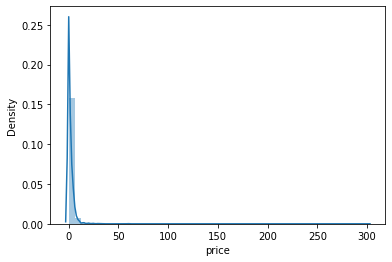

In [19]:
sns.distplot(df_final['price'])


## Diagrama de correlacion de App Store
Primeramente cabe recalcar que no existe una gran correlación entre una variable y otra en el dataset presente, sin embargo la varibale ratin_count_ver con rating_count presentan un cierto nivel de correlación, esto indica que entre una version de la app y otra no existe mucha diferencia.

<AxesSubplot:>

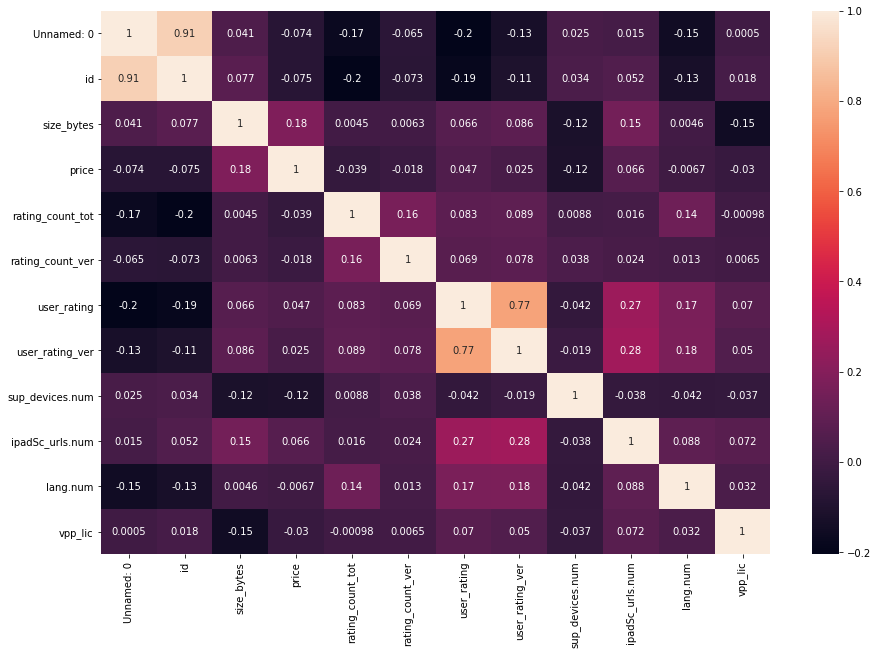

In [25]:
#Using the correlation method

plt.rcParams['figure.figsize'] = (15.0, 10.0)  # dimensión
sns.heatmap(df_appstore.corr(), annot=True)  # annot_True para presentar el coeficiente de correlación

## Diagrama de correlación de Play Store
En el diagrama de correlación de las principales aplicaciones de Play Store tenemos un cierto nivel de relación entre las variables installs con valorations, esto quiere decir que de una u otra manera el nivel de valoraciones tiene que ver con el numero de instalaciones de la aplicación, puesto que cuando una app esta bien puntuada tiende a ser mas instalada por los usuarios, es decir genera una alta espectativa que aumenta las probabilidades de que varios usuarios la instalen, esto también involucra el posicionamiento de la aplicación dentro de Play Store, las aplicaciones más populares son las que tienen mayores valoraciones e instalaciones, son valores proporcionales.

<AxesSubplot:>

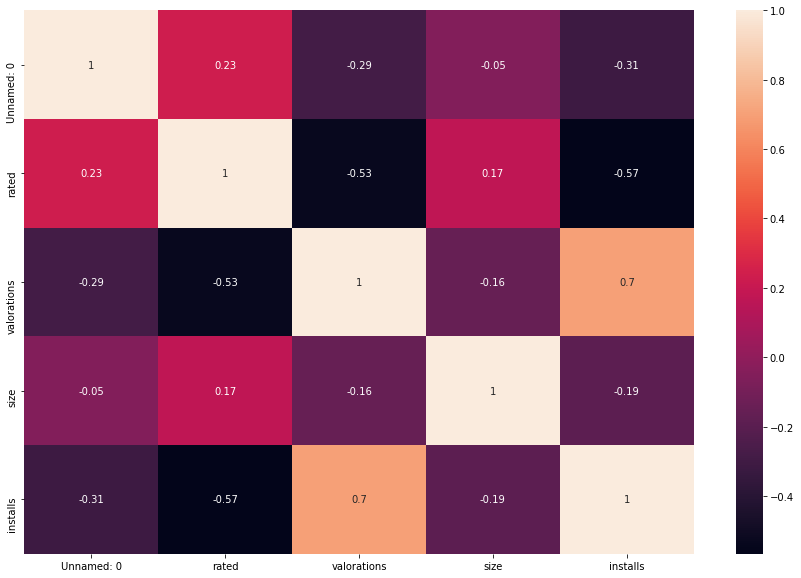

In [26]:
#Using the correlation method

plt.rcParams['figure.figsize'] = (15.0, 10.0)  # dimensión
sns.heatmap(df_playstore.corr(), annot=True)  # annot_True para presentar el coeficiente de correlación

# ¿Cuales son los géneros con más aplicaciones de paga?:
Para poder visualizar la relación entre el tipo de género de cada aplicación y su valor en el mercado actual, según la gáfica presente se puede deducir que las aplicaciones de género "Medical" tienden a ser mas costosas con un promedio de 8$ que las del resto de géneros, seguidamente le sigue aplicaciones de música, negocios, productividad, etc...
Por otro lado tenemos las aplicaciones de género mas baratas como lo son de noticias, finanzas, redes sociales, entretenimiento, etc...

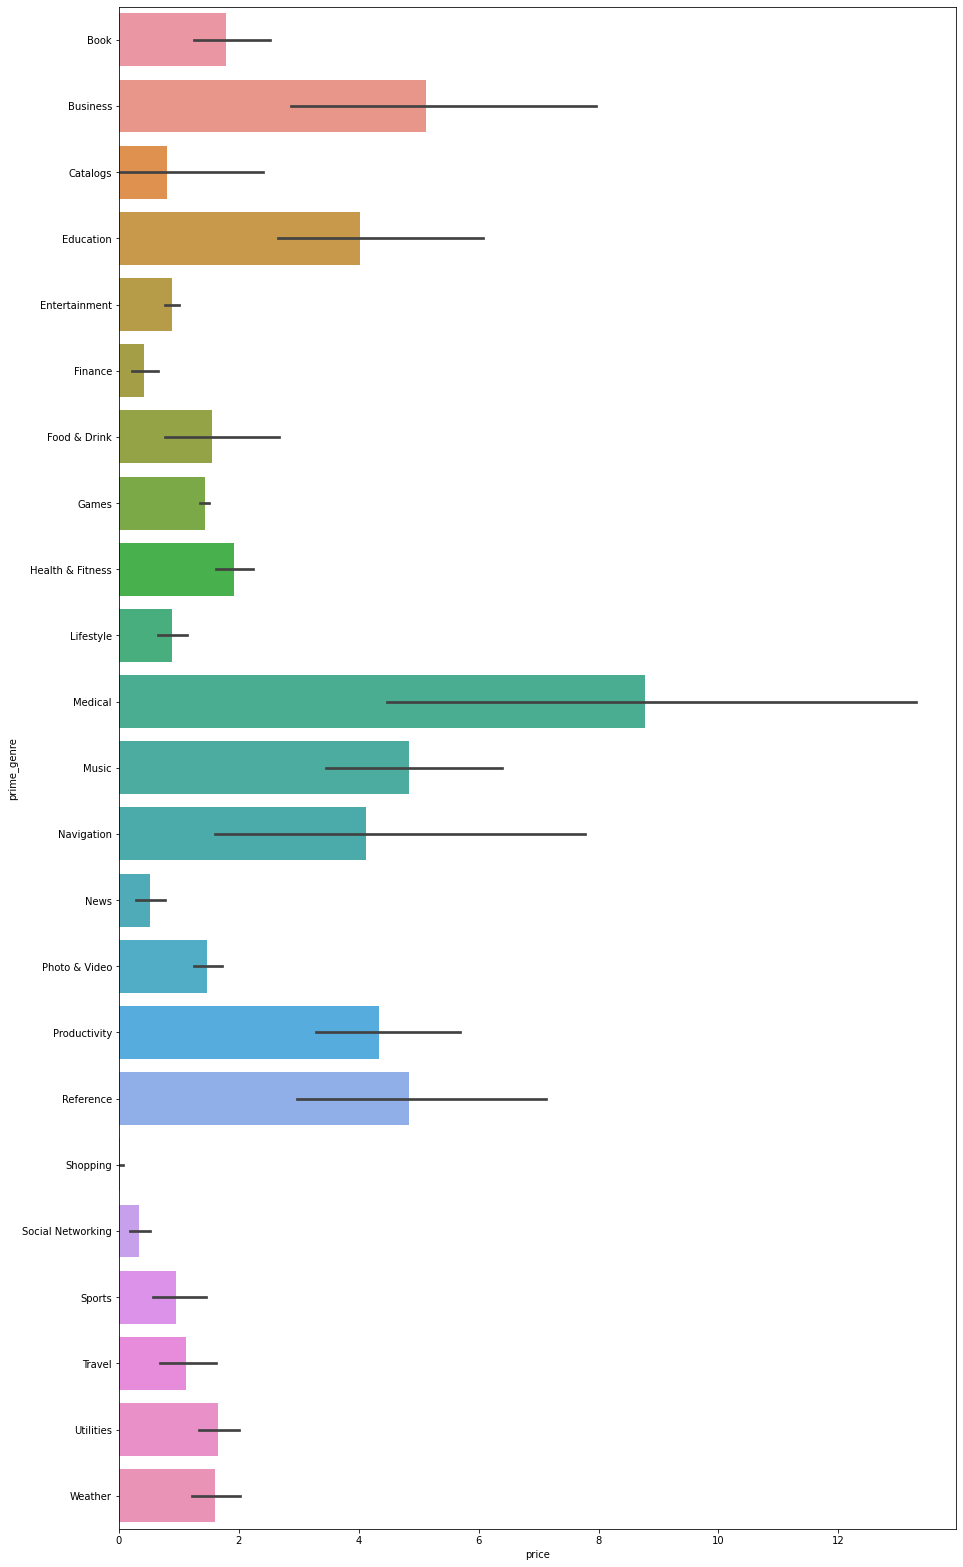

In [20]:
fig, ax = plt.subplots(figsize = (15,28))
ax = sns.barplot(x="price", y="prime_genre", data=df_final.sort_values('prime_genre'))

# Diagrama de dispersión entre valorations e installs:
Podemos observar que no existe una gran correlación entre la variable valorations y la de installs, sin embrgo se evidencian varios valores atípicos en la gráfica.

<AxesSubplot:xlabel='valorations', ylabel='installs'>

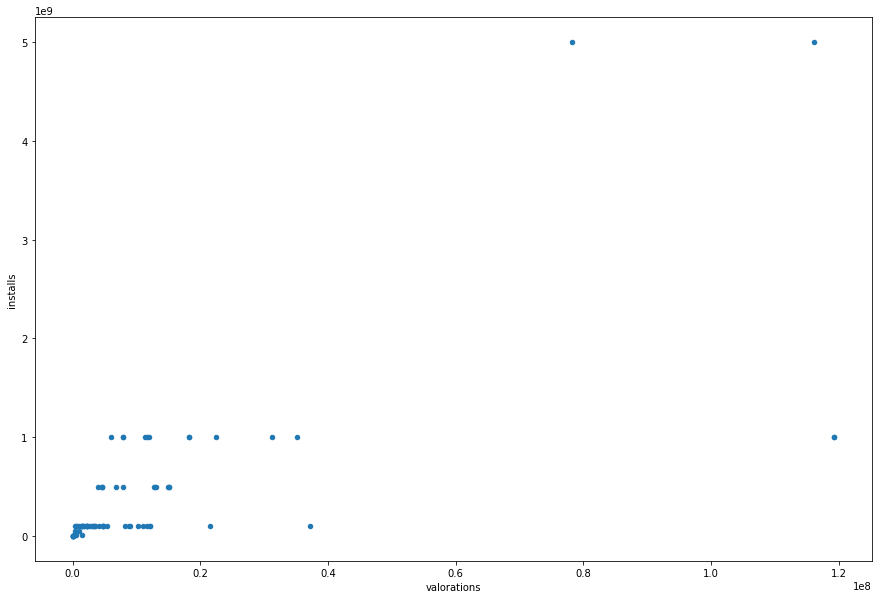

In [32]:
df_playstore.plot(kind='scatter', x='valorations', y='installs')

# Diagrama de dispersión entre user_rating y user_rating_ver:

La presente gráfica tiene la finalidad de analizar la relación que existe entre user_rating y user_rating_ver, que son las valoraciones de usuarios a traves de las distintas versiones que ha pasado la aplicación, en este caso las valoraciones se observan simetricas y poco variantes, quiere decir que existen valoraciones de una versión a la actual que la diferencia entre ellas es insignificativa, si existe algún cambio radical entre valoraciones de una a otra esto se debería dar a que algún componente de la aplicación no funciona, o dejo funcionar para varios dispositivos, lo cual da margen a infinidad de conclusiones.

<AxesSubplot:xlabel='user_rating', ylabel='user_rating_ver'>

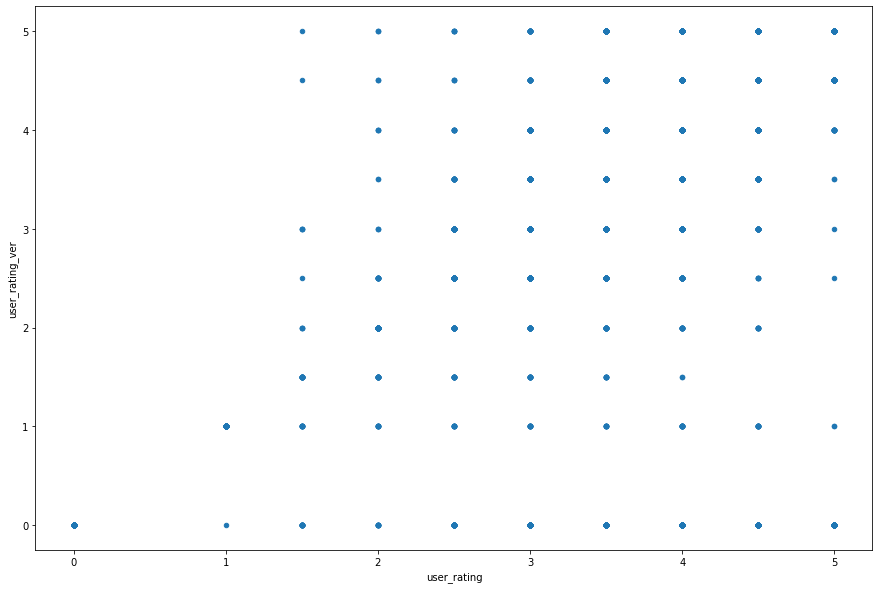

In [33]:
df_appstore.plot(kind='scatter', x='user_rating', y='user_rating_ver')

# ¿Como están distribuidas las valoraciones de las plicaciones Games y Entertainment?
<br>

La distribución corresponde a las valoraciones que han tenido las aplicaciones por género **Games** y **Entertainment** los resultados indican que las valoracione para aplicaciones que son juegos se centran en valoraciones de **4** y **4,5**, al existir más densidad de aplicaciones de este tipo tiene más probabilidades de que escalen en las valoraciones de usuarios, en el caso de aplicaciones de tipo **Entertainment** los rangos de puntuaciones se encuentran centralizados de **3** a **4,5** estando un poco por debajo que los Juegos, pero que en calificación de **5** existe una amplia diferencia entre ambas.

Además comparando la cantidad de Juegos con calificación de **0.0** es equivalente al **6%** del total de aplicaciones que son Juegos y aproximadamente un **12%** dentro del genero Games. 


2021-05-23 11:50:42,593 [11756] WARNING  py.warnings:110: [JupyterRequire] c:\users\juanj\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Text(0.5, 1.0, 'Distribution of user_rating, by prime_gender | Games & Entertainment')

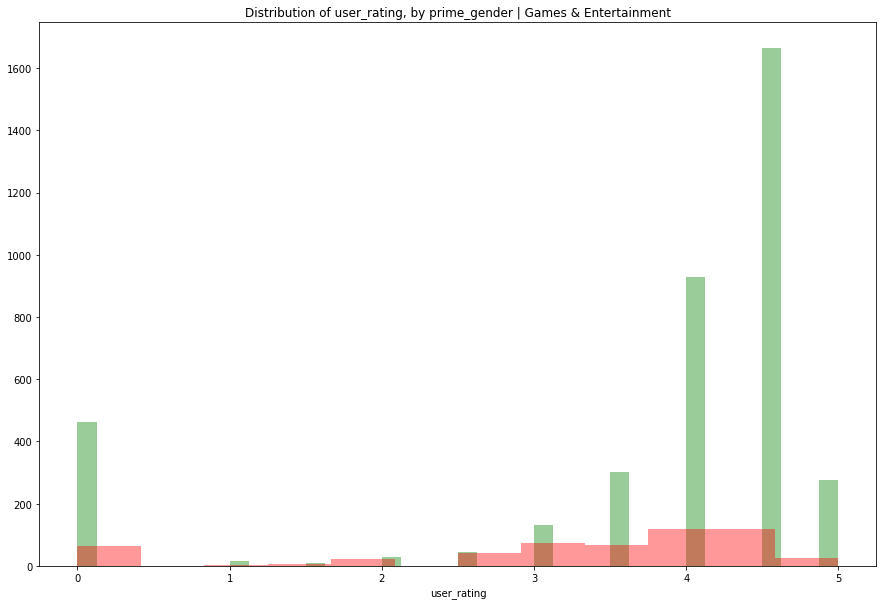

In [42]:
df_games = df_final[df_final['prime_genre'] == 'Games']
df_entertainment = df_final[df_final['prime_genre'] == 'Entertainment']

sns.distplot(a=df_games['user_rating'], label='Games', kde=False, color="g")
sns.distplot(a=df_entertainment['user_rating'], label="Entertainment", kde=False, color="r")

# Titulo de la gráfica
plt.title("Distribution of user_rating, by prime_gender | Games & Entertainment")